# Classification  
We use features, and a classifier, to predict categorical variables.  

### Steps in doing Classification 
1. Import Packages 
2. Load dataset  and set X and y 
3. Train-test Split  
4. Descriptive and Prescriptive Analytics on Train Set  
5. Predictive Analytics from Train Set to Test Set  
6. Metrics (accuracy, precision, recall, and confusion matrix)  
7. Explain Results  

# 1. Import Packages

In [1]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset

from sklearn.linear_model import LogisticRegression # linear model for classification

from sklearn.metrics import confusion_matrix
# from xgboost import XGBClassifier

# 2. Load Data

In [2]:
data = pd.read_csv('census.csv')

In [3]:
data.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [4]:
data.shape

(45222, 14)

In [5]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

### Dataset Description  

We want to predict if the user has annual income greater than or below $50,000 based on features such as:  

- age
- workclass 
- education level
- education-num
- marital-status
- occupation
- relationship
- race
- sex
- capital-gain
- capital-loss
- hours-per-week
- native-country

In [7]:
# write list of features we want to use
features = ['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

# Set X
X_temp = data[features]


# Convert text to numeric
X = pd.get_dummies(X_temp)
X.head(5)


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


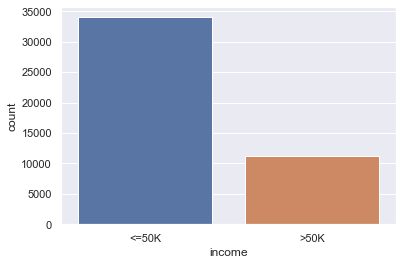

In [14]:
# Check if income data is imbalanced
sns.countplot(x ="income", data=data) 

In [15]:
# Convert income to dummies
income_temp = pd.get_dummies(data['income'])
income_temp.head(5)

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [16]:
# # Set y

y = income_temp.copy()
y= y[">50K"]

In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: >50K, dtype: uint8

In [18]:
! pip install imblearn

In [19]:
# fix imbalanced data by generating synthetic samples (SMOTE)
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X,y)

In [21]:
# check for generated new data points
print(X_res.shape[0] - X.shape[0], 'synthetic data points')

22806 synthetic data points


# 3. Train-Test Split  
We use the training set for descriptive and diagnostic analytics and use the model we develop here to do predictive analytics on the test set.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.4, random_state = 42)

# 4. Predictive Analytics
Train a model that predicts if user has annual income of greater than or below $50, 000. 

In [23]:
! pip install xgboost

In [24]:
from xgboost import XGBClassifier
import sklearn.metrics as metrics

In [25]:
# initialize model

model = XGBClassifier()

# fit model

model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)[::1,]

#metrics
acc = metrics.accuracy_score(y_test, y_pred) # accuracy
precision = metrics.precision_score(y_test, y_pred) # precision
recall = metrics.recall_score(y_test, y_pred) # recall

# 5. Metrics

After applying SMOTE, precision and recall increased



In [27]:
# print metrics
print("Accuracy: {}".format(acc))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))


Accuracy: 0.8621196530942231
Precision: 0.8364827068695
Recall: 0.9004920320188


### What is a Confusion Matrix?  
A confusion matrix is a summary of prediction results on a classification problem.  

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.  

The confusion matrix shows the ways in which your classification model is confused when it makes predictions.  

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.  

It is this breakdown that overcomes the limitation of using classification accuracy alone.  

In [28]:
# confusion matrix
cf = confusion_matrix(y_pred, y_test)
cf

array([[11198,  1355],
       [ 2397, 12262]], dtype=int64)

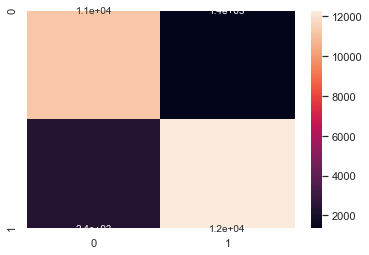

In [29]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

# 7. Explain Results

86% accuracy means the model is able to identify if user has annual income of greater than $50,000.  
The model is 90 percent precise in correctly predicting user has annual income greater than $50,000.
At a recall rate of 90%, users with actual annual income of greater than $50,000 are correctly predicted. 


*For the confusion matrix, we want the diagonal values to be higher than off diagonal 
values.   
*For the heatmap of confusion matrix, we want the diagonal to be darker than off diagonal.

[Guide to confusion matrices](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

# 8. Explain Predictions

We can try out our model with new data to see if we can predict that the user will click on the ad or not.

In [30]:
# Assign test data into new variable
test_data = X_test

# Create column to insert predictions
test_data['predictions'] = y_pred

C:\Users\Rachelle Melendres\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [31]:
# Describe why the 
test_data[test_data['predictions']==0].describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,predictions
count,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,...,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.0
mean,35.976101,9.460649,122.903051,51.437425,38.878377,0.022226,0.063889,0.765315,0.012826,0.084920,...,0.004939,0.000319,0.001832,0.000398,0.000876,0.000398,0.904963,0.002549,0.000398,0.0
std,13.655511,2.435772,676.143052,304.333141,11.953632,0.147423,0.244565,0.423819,0.112526,0.278774,...,0.070107,0.017849,0.042767,0.019955,0.029590,0.019955,0.293278,0.050427,0.019955,0.0
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,25.000000,9.000000,0.000000,0.000000,35.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
50%,33.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,45.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,90.000000,16.000000,6849.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [32]:
test_data[test_data['predictions']==1].describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,predictions
count,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,...,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,14659.000000,14659.0
mean,43.949383,11.613847,3744.978289,186.459216,45.720502,0.028106,0.047070,0.592059,0.046115,0.044273,...,0.001160,0.000273,0.000819,0.000682,0.000205,0.000273,0.921141,0.000478,0.000273,1.0
std,10.070371,2.162811,14176.313908,582.486565,10.641292,0.165280,0.211796,0.491469,0.209741,0.205708,...,0.034036,0.016517,0.028601,0.026110,0.014305,0.016517,0.269528,0.021848,0.016517,0.0
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,36.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
50%,43.000000,12.000000,0.000000,0.000000,40.831017,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,51.000000,13.000000,0.000000,0.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
max,90.000000,16.000000,99999.000000,3307.388409,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


# 9. ROC Curve

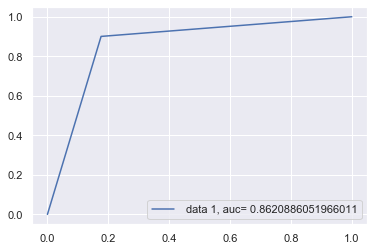

In [33]:
# y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label =" data 1, auc= "+str(auc))
plt.legend(loc=4)
plt.show()